# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data = 'output_data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lengs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

cities = pd.Series(cities).str.capitalize().tolist()

len(cities)

587

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
import json
from pprint import pprint

url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'metric'
weather_url = f'{url}appid={weather_api_key}&units={units}&q='

# response = requests.get(weather_url + 'paris').json()
# pprint(response['main']['temp'])

templist = []
cnumber = []
city1 = []
hum = []
lat = []
lng = []
wind = []
cloud = []
cid = []
dt = []

for city in cities:
    response = requests.get(weather_url + city).json()

    try:
        temp1 = response['main']['temp']
        cityno = response['id']
        city1.append(city)
        cnumber.append(cityno)
        templist.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        cloud.append(response['clouds']['all'])
        cid.append(response['sys']['country'])
        dt.append(response['dt'])
        
        print(f'The temperature of the city {city} with Id of {cityno} is of {temp1} celsius degrees')
    except:
        print(f'City {city} not found')
        pass
#print(cities)
#len(cities)

The temperature of the city De-kastri with Id of 2126018 is of -9.63 celsius degrees
The temperature of the city Hobart with Id of 2163355 is of 16.88 celsius degrees
The temperature of the city Teya with Id of 1489656 is of -26.65 celsius degrees
The temperature of the city Sola with Id of 2134814 is of 27.19 celsius degrees
The temperature of the city Lorengau with Id of 2092164 is of 28.38 celsius degrees
The temperature of the city Hilo with Id of 5855927 is of 19.86 celsius degrees
The temperature of the city Butaritari with Id of 2110227 is of 27.41 celsius degrees
The temperature of the city Victoria with Id of 1819729 is of 16.05 celsius degrees
The temperature of the city Tiksi with Id of 2015306 is of -25.89 celsius degrees
The temperature of the city Ribeira grande with Id of 3372707 is of 14.37 celsius degrees
The temperature of the city Aniva with Id of 2127154 is of -13 celsius degrees
The temperature of the city Port alfred with Id of 964432 is of 24.44 celsius degrees
T

The temperature of the city Mareeba with Id of 2158767 is of 25.99 celsius degrees
The temperature of the city Bozova with Id of 320581 is of 10 celsius degrees
The temperature of the city Port hedland with Id of 2063042 is of 25 celsius degrees
The temperature of the city Ulladulla with Id of 2145554 is of 17.07 celsius degrees
The temperature of the city Sabha with Id of 2212775 is of 15.32 celsius degrees
The temperature of the city Yulara with Id of 6355222 is of 23 celsius degrees
The temperature of the city Constitucion with Id of 3893726 is of 15.83 celsius degrees
The temperature of the city Pangai with Id of 4032369 is of 27.5 celsius degrees
The temperature of the city Asahikawa with Id of 2130629 is of -7 celsius degrees
City Saleaula not found
The temperature of the city Longyearbyen with Id of 2729907 is of -13 celsius degrees
The temperature of the city Puerto carreno with Id of 3671519 is of 32.9 celsius degrees
The temperature of the city Dunedin with Id of 2191562 is o

The temperature of the city Tera with Id of 2438855 is of 25.35 celsius degrees
The temperature of the city Dakar with Id of 2253354 is of 19 celsius degrees
The temperature of the city Airai with Id of 1651810 is of 17.71 celsius degrees
The temperature of the city Karratha with Id of 6620339 is of 26.51 celsius degrees
The temperature of the city Naze with Id of 1855540 is of 20 celsius degrees
The temperature of the city Pedernales with Id of 3495137 is of 26.42 celsius degrees
The temperature of the city Richards bay with Id of 962367 is of 24.35 celsius degrees
City Turtkul not found
The temperature of the city Hargeysa with Id of 57289 is of 15.73 celsius degrees
The temperature of the city Sitka with Id of 5557293 is of 3 celsius degrees
The temperature of the city Kijang with Id of 1842966 is of 6 celsius degrees
The temperature of the city Suez with Id of 359796 is of 14.51 celsius degrees
City Atka not found
The temperature of the city Huarmey with Id of 3939168 is of 24.32 c

City Dzhusaly not found
City Kazalinsk not found
The temperature of the city Hailar with Id of 2037078 is of -25.9 celsius degrees
The temperature of the city Kamyshin with Id of 553287 is of -9.01 celsius degrees
The temperature of the city Fort nelson with Id of 5955902 is of -18 celsius degrees
The temperature of the city Pacific grove with Id of 5380437 is of 13.19 celsius degrees
The temperature of the city Romitan with Id of 1217662 is of 6 celsius degrees
The temperature of the city Batagay-alyta with Id of 2027042 is of -24.87 celsius degrees
The temperature of the city Sorland with Id of 3137469 is of -0.89 celsius degrees
The temperature of the city Songea with Id of 877401 is of 22 celsius degrees
The temperature of the city Orcopampa with Id of 3933986 is of 9.2 celsius degrees
The temperature of the city Rosarito with Id of 3988392 is of 15 celsius degrees
The temperature of the city Port macquarie with Id of 2152659 is of 22.99 celsius degrees
The temperature of the city 

The temperature of the city Kirovo-chepetsk with Id of 548395 is of -12.77 celsius degrees
The temperature of the city Tarancon with Id of 3108317 is of 8.32 celsius degrees
The temperature of the city Dunmore town with Id of 3572462 is of 24.57 celsius degrees
The temperature of the city Isangel with Id of 2136825 is of 28 celsius degrees
The temperature of the city Sibiti with Id of 2255285 is of 21.3 celsius degrees
The temperature of the city Lubao with Id of 1705441 is of 23 celsius degrees
The temperature of the city Unai with Id of 3445764 is of 22.54 celsius degrees
City Louisbourg not found
The temperature of the city Kirakira with Id of 2178753 is of 29 celsius degrees
The temperature of the city Iringa with Id of 159071 is of 20 celsius degrees
The temperature of the city Erzin with Id of 296852 is of 13.89 celsius degrees
The temperature of the city Guerrero negro with Id of 4021858 is of 16.38 celsius degrees
The temperature of the city Klaksvik with Id of 2618795 is of 3 

The temperature of the city Atar with Id of 2381334 is of 19.47 celsius degrees
The temperature of the city Kresttsy with Id of 541116 is of -15.57 celsius degrees
The temperature of the city Cabacao with Id of 1722053 is of 24.98 celsius degrees
The temperature of the city Katsuura with Id of 2112309 is of 10.97 celsius degrees
The temperature of the city Tevriz with Id of 1489661 is of -12.41 celsius degrees
The temperature of the city Westport with Id of 4845585 is of -2.14 celsius degrees
The temperature of the city Alofi with Id of 4036284 is of 30 celsius degrees
The temperature of the city Joshimath with Id of 1268814 is of 7.38 celsius degrees
The temperature of the city Masunga with Id of 933390 is of 19.36 celsius degrees
The temperature of the city Knysna with Id of 988698 is of 22 celsius degrees
The temperature of the city Poum with Id of 2138555 is of 26.46 celsius degrees
The temperature of the city Nioki with Id of 2311968 is of 23.62 celsius degrees
The temperature of 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
citydf = pd.DataFrame({'City ID':cnumber,
                       'City':city1,
                       'Lat':lat,
                       'Lng':lng,
                       'Max Temp':templist,
                       'Humidity':hum,
                       'Cloudiness':cloud,
                       'Wind Speed':wind,
                       'Country':cid,
                       'Date':dt})

citydf.to_csv('city_temperature_df.csv', index=False)

cdf = pd.read_csv('city_temperature_df.csv')
# cdf['Humidity'] = cdf['Humidity'].map('{:.0f}%'.format)
cdf

,City ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,2126018,De-kastri,51.4667,140.7833,-9.63,94,98,0.34,RU,1613256586
1,2163355,Hobart,-42.8794,147.3294,17.78,67,20,1.54,AU,1613256342
2,1489656,Teya,60.3778,92.6267,-26.65,85,100,1.71,RU,1613256586
3,2134814,Sola,-13.8833,167.5500,27.19,83,100,8.12,VU,1613256586
4,2092164,Lorengau,-2.0226,147.2712,28.38,75,99,2.76,PG,1613256586
...,...,...,...,...,...,...,...,...,...,...
541,3430443,Necochea,-38.5473,-58.7368,20.00,89,100,1.34,AR,1613256698
542,3038333,Ajaccio,42.0000,8.9167,6.00,70,90,4.63,FR,1613256698
543,2122104,Petropavlovsk-kamchatskiy,53.0452,158.6483,-17.00,66,86,4.00,RU,1613256460
544,1783873,Zhumadian,32.9794,114.0294,10.82,86,99,2.18,CN,1613256657


In [5]:
cdf.sort_values(by='Humidity', ascending=False)

,City ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
441,1674199,Toucheng,24.8592,121.8233,17.00,100,75,1.03,TW,1613256680
197,1651810,Airai,-8.9266,125.4092,17.71,100,100,0.41,TL,1613256617
325,1524243,Georgiyevka,43.0369,74.7114,0.00,100,90,1.00,KZ,1613256659
529,2963155,Kinsale,51.7075,-8.5306,9.00,100,90,10.29,IE,1613256696
243,2984701,Quimper,48.0000,-4.1000,4.00,100,90,6.69,FR,1613256643
...,...,...,...,...,...,...,...,...,...,...
195,2438855,Tera,14.0078,0.7531,25.35,15,0,3.88,NE,1613256630
257,2249281,Linguere,15.3953,-15.1193,26.54,13,0,5.67,SN,1613256647
317,4005539,Guadalajara,20.6667,-103.3333,23.00,12,1,4.12,MX,1613256658
509,2268313,Fazendas de almeirim,39.1755,-8.5693,11.11,10,21,1.06,PT,1613256692


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
hdf = cdf[cdf['Humidity'] >100]
hdf

,City ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
humidity = cdf['Humidity']
hquartiles = humidity.quantile([.25,.5,.75])
lowerq = hquartiles[0.25]
upperq = hquartiles[0.75]
iqr = upperq-lowerq

# print(f'The lower quartile of humidity is: {lowerq}')
# print(f'The upper quartile of humidity is: {upperq}')
# print(f'The interquartile of humidity is: {iqr}')
# print(f'The median of humidity is: {hquartiles[.5]}')

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# print(f'Values below {lower_bound} could be outliers.')
# print(f'Values above {upper_bound} could be outliers.')
clean_city_data = cdf[['City ID', 'City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date']]

for index,rows in clean_city_data.iterrows():
    if rows['Humidity'] < lower_bound or rows['Humidity'] > upper_bound:
        clean_city_data.drop(index, inplace=True)
    else:
        pass

clean_city_data = clean_city_data.reset_index(drop=True)
clean_city_data
    
# clean_city_data = cdf[(cdf['Humidity'] > lower_bound) & (cdf['Humidity'] < upper_bound)].reset_index(drop=True)#, inplace=False)
# clean_city_data.sort_values(by='Humidity', ascending=False)

,City ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,2126018,De-kastri,51.4667,140.7833,-9.63,94,98,0.34,RU,1613256586
1,2163355,Hobart,-42.8794,147.3294,17.78,67,20,1.54,AU,1613256342
2,1489656,Teya,60.3778,92.6267,-26.65,85,100,1.71,RU,1613256586
3,2134814,Sola,-13.8833,167.5500,27.19,83,100,8.12,VU,1613256586
4,2092164,Lorengau,-2.0226,147.2712,28.38,75,99,2.76,PG,1613256586
...,...,...,...,...,...,...,...,...,...,...
521,3430443,Necochea,-38.5473,-58.7368,20.00,89,100,1.34,AR,1613256698
522,3038333,Ajaccio,42.0000,8.9167,6.00,70,90,4.63,FR,1613256698
523,2122104,Petropavlovsk-kamchatskiy,53.0452,158.6483,-17.00,66,86,4.00,RU,1613256460
524,1783873,Zhumadian,32.9794,114.0294,10.82,86,99,2.18,CN,1613256657


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

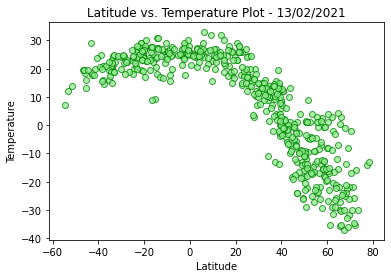

The temperature drops when the latutude is further away from Zero, specially towards positive coords.


In [22]:
x_limit = max(clean_city_data['Lat'])+5
x_axis = clean_city_data['Lat']
data = clean_city_data['Max Temp']

plt.scatter(x_axis, data, marker='o', facecolors='lightgreen', edgecolors='green',
           alpha=.75)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude vs. Temperature Plot - 13/02/2021')
plt.savefig('../output_data/figure1.png')
plt.show()

print('The temperature drops when the latutude is further away from Zero, specially towards positive coords.')

## Latitude vs. Humidity Plot

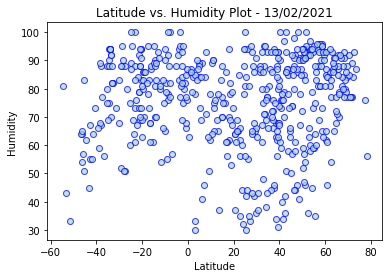

We can visualize that there is no real correlation between the Latitude and Humidity. You can get a humidity percentage of 30% or 90% in the same latitude.


In [23]:
x_limit = max(clean_city_data['Lat'])+5
x_axis = clean_city_data['Lat']
data = clean_city_data['Humidity']

plt.scatter(x_axis, data, marker='o', facecolors='lightblue', edgecolors='blue',
           alpha=.75)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity Plot - 13/02/2021')
plt.savefig('../output_data/figure2.png')
plt.show()

print('We can visualize that there is no real correlation between the Latitude and Humidity. You can get a humidity percentage of 30% or 90% in the same latitude.')

## Latitude vs. Cloudiness Plot

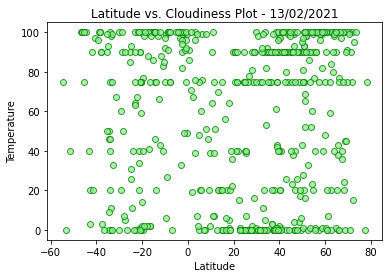

We can visualize that there is no real correlation between the Latitude and Cloudiness.


In [24]:
x_limit = max(clean_city_data['Lat'])+5
x_axis = clean_city_data['Lat']
data = clean_city_data['Cloudiness']

plt.scatter(x_axis, data, marker='o', facecolors='lightgreen', edgecolors='green',
           alpha=.75)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude vs. Cloudiness Plot - 13/02/2021')
plt.savefig('../output_data/figure3.png')
plt.show()

print('We can visualize that there is no real correlation between the Latitude and Cloudiness.')

## Latitude vs. Wind Speed Plot

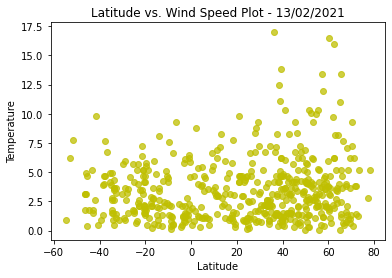

We can visualize that there is no real correlation between the Latitude and Wind Speed.


In [25]:
x_limit = max(clean_city_data['Lat'])+5
x_axis = clean_city_data['Lat']
data = clean_city_data['Wind Speed']

plt.scatter(x_axis, data, marker='o', facecolors='y', edgecolors='y',
           alpha=.75)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude vs. Wind Speed Plot - 13/02/2021')
plt.savefig('../output_data/figure4.png')
plt.show()

print('We can visualize that there is no real correlation between the Latitude and Wind Speed.')

## Linear Regression

In [13]:
nh = clean_city_data[clean_city_data['Lat'] >= 0].reset_index(drop=True)
sh = clean_city_data[clean_city_data['Lat'] < 0].reset_index(drop=True)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.7719198320955465. 


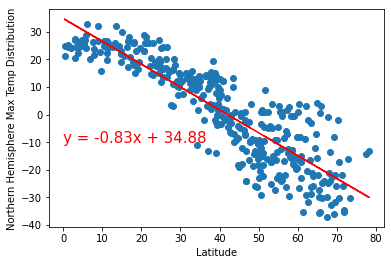

In [26]:
x_values = nh['Lat']
y_values = nh['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Northern Hemisphere Max Temp Distribution')
print(f'The r-squared is {rvalue**2}. ')
plt.savefig('../output_data/figure5.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.2876590964065399. 


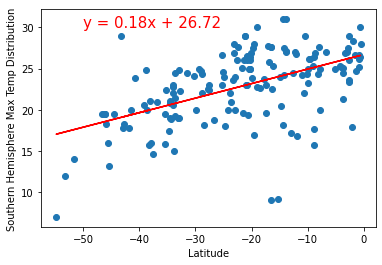

We can see from both Linear Regression Graphics that the temperature will drop down as you get urther from Latitude 0


In [27]:
x_values = sh['Lat']
y_values = sh['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Southern Hemisphere Max Temp Distribution')
print(f'The r-squared is {rvalue**2}. ')
plt.savefig('../output_data/figure6.png')
plt.show()

print('We can see from both Linear Regression Graphics that the temperature will drop down as you get urther from Latitude 0')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.052031100629518524. 


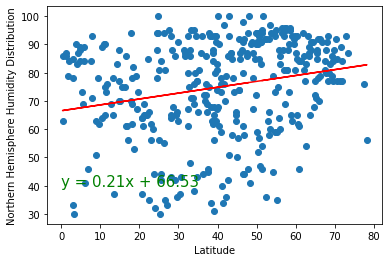

In [28]:
x_values = nh['Lat']
y_values = nh['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,40),fontsize=15,color="green")
plt.xlabel('Latitude')
plt.ylabel('Northern Hemisphere Humidity Distribution')
print(f'The r-squared is {rvalue**2}. ')
plt.savefig('../output_data/figure7.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.11534400444087274. 


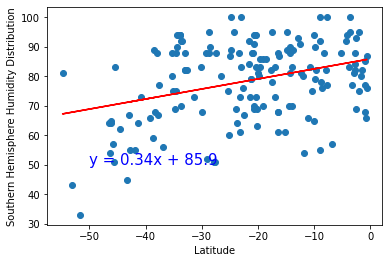

From both plots and regressions, we can see that the trend is positive.


In [29]:
x_values = sh['Lat']
y_values = sh['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,50),fontsize=15,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Southern Hemisphere Humidity Distribution')
print(f'The r-squared is {rvalue**2}. ')
plt.savefig('../output_data/figure8.png')
plt.show()
print('From both plots and regressions, we can see that the trend is positive.')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.058509022248310415. 


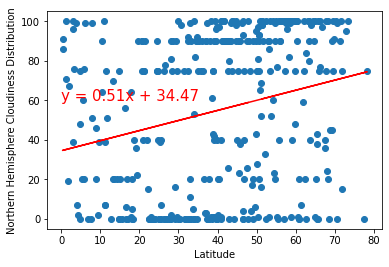

In [18]:
x_values = nh['Lat']
y_values = nh['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Northern Hemisphere Cloudiness Distribution')
print(f'The r-squared is {rvalue**2}. ')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.0403981153026342. 


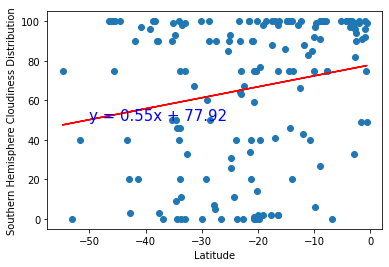

The trend between cloudiness and latitude is positive, the Northern Hemisphere Regression is bigger, though.


In [19]:
x_values = sh['Lat']
y_values = sh['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,50),fontsize=15,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Southern Hemisphere Cloudiness Distribution')
print(f'The r-squared is {rvalue**2}. ')
plt.show()
print('The trend between cloudiness and latitude is positive, the Northern Hemisphere Regression is bigger, though.')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.011335063027037053. 


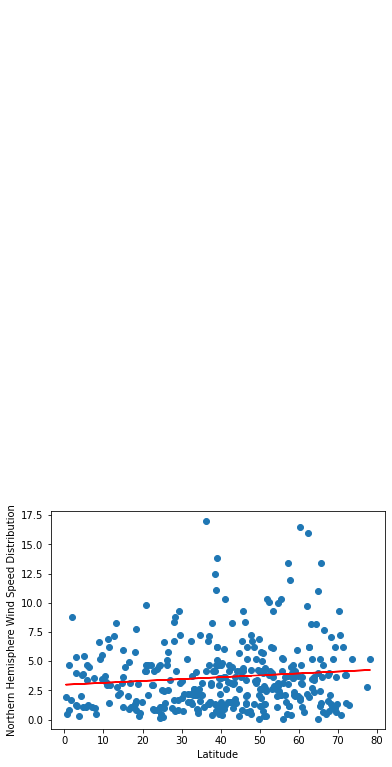

In [20]:
x_values = nh['Lat']
y_values = nh['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Northern Hemisphere Wind Speed Distribution')
print(f'The r-squared is {rvalue**2}. ')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.014663591251978808. 


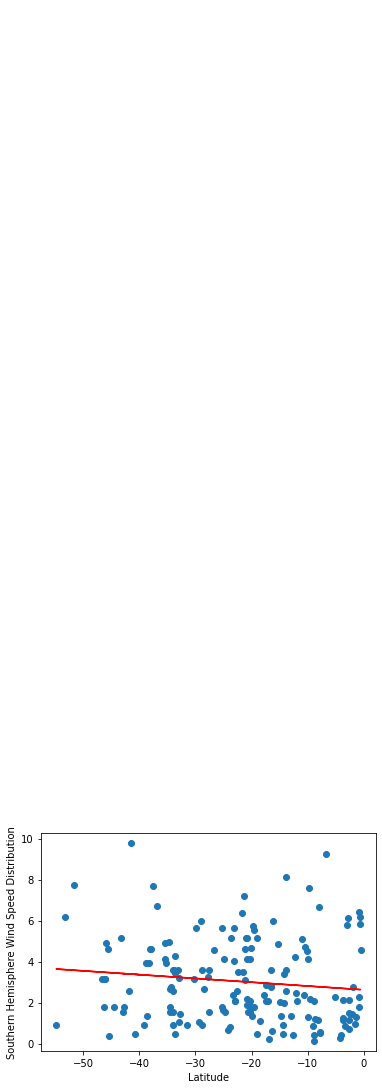

The trend between wind speed and latitude is a bit positive when latitude is positive and a bit negative when latitude goes further from zero.


In [21]:
x_values = sh['Lat']
y_values = sh['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,50),fontsize=15,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Southern Hemisphere Wind Speed Distribution')
print(f'The r-squared is {rvalue**2}. ')
plt.show()
print('The trend between wind speed and latitude is a bit positive when latitude is positive and a bit negative when latitude goes further from zero.')